# [응용1] 다중 선형회귀 연습 - load_diabetes

### 필요한 모듈 import

In [30]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 상관계수 히트맵으로 시각화
import seaborn as sns

In [25]:
## 폰트 설정
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)

#폰트 적용
# Set font family globally
mpl.rcParams['font.family'] = 'NanumGothic'
print(mpl.rcParams['font.family'])

# 한글 표시를 위해 폰트 지정 필수
# 기본 폰트 적용은 rcParams 설정으로
# - font.family : 기본 폰트 종류 적용
# - axes.unicode_minus : False로 설정 시 마이너스 기호로 ASCII로 한다.

mpl.rcParams["font.family"] = 'NanumGothic'
mpl.rcParams["axes.unicode_minus"] = False

plt.rcParams['axes.unicode_minus'] = False    # 마이너스 깨짐 방지


NanumGothic
SeoulNamsan
['NanumGothic']


In [2]:
def get_score(y_test, y_pred):
    """
    mse,rmse,r2 계산
    """
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)

    return (mse,rmse,r2)

In [3]:
diab = load_diabetes()

print(diab)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

### 데이터 수집

In [4]:
diab.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
diab.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### 데이터 이해

In [86]:
diab.keys()
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
# 히트맵
diab_df = pd.DataFrame(diab.data,columns=diab.feature_names)
diab_df

In [29]:
# 변수 간의 상관관계를 히트맵으로 시각화 및 탐색

# 상관계수를 구하여 저장
corr_df = diab_df.corr()
corr_df
# 0.4~0.6 사이에 있으면 연관성이 있다라고 본다

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.0000,0.1737,0.1851,0.3354,0.2601,0.2192,-0.0752,0.2038,0.2708,0.3017
sex,0.1737,1.0000,0.0882,0.2410,0.0353,0.1426,-0.3791,0.3321,0.1499,0.2081
bmi,0.1851,0.0882,1.0000,0.3954,0.2498,0.2612,-0.3668,0.4138,0.4462,0.3887
bp,0.3354,0.2410,0.3954,1.0000,0.2425,0.1855,-0.1788,0.2577,0.3935,0.3904
s1,0.2601,0.0353,0.2498,0.2425,1.0000,0.8967,0.0515,0.5422,0.5155,0.3257
s2,0.2192,0.1426,0.2612,0.1855,0.8967,1.0000,-0.1965,0.6598,0.3184,0.2906
s3,-0.0752,-0.3791,-0.3668,-0.1788,0.0515,-0.1965,1.0000,-0.7385,-0.3986,-0.2737
s4,0.2038,0.3321,0.4138,0.2577,0.5422,0.6598,-0.7385,1.0000,0.6179,0.4172
s5,0.2708,0.1499,0.4462,0.3935,0.5155,0.3184,-0.3986,0.6179,1.0000,0.4647
s6,0.3017,0.2081,0.3887,0.3904,0.3257,0.2906,-0.2737,0.4172,0.4647,1.0000


<AxesSubplot: >

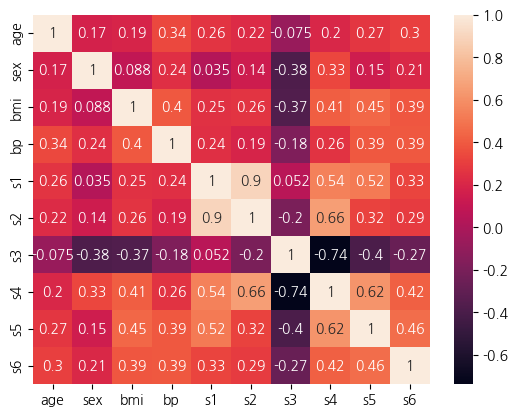

In [32]:
# 상관계수 히트맵으로 시각화
sns.heatmap(corr_df,annot=True)

In [7]:
pd.options.display.float_format = '{:.4f}'.format

In [8]:
pd.DataFrame(diab.data).describe()

,0,1,2,3,4,5,6,7,8,9
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356


In [9]:
diab.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### 데이터 준비

In [10]:
def evaluate_score(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)

    print(f'mse-{mse:.4f}')
    print(f'rmse-{rmse:.4f}')
    print(f'r2-{r2:.4f}')
    return

In [12]:
x= diab.data
y = diab.target

### 모델 구축

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=27)

In [14]:
# 희귀 모델 객체 생성
lr = LinearRegression()

In [15]:
# 모델 학습
reg = lr.fit(x_train,y_train)

In [16]:
# 회귀 계수, 절편 확인
coef = reg.coef_
intercept = reg.intercept_
coef

array([  42.13333043, -256.72425295,  585.6676767 ,  300.37906054,
       -870.33272996,  492.32141742,  184.85940209,  262.17156228,
        772.18576504,   54.44716253])

### 모델 평가

In [17]:
y_pred = reg.predict(x_test)

mse, rmse, r2 = get_score(y_test, y_pred)

print(f'MSE : {mse:.4f},RMSE:{rmse:.4f},R2:{r2:.4f}'.format(mse,rmse,r2))


MSE : 2712.4894,RMSE:52.0816,R2:0.3953


##### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [20]:
coef = pd.Series(coef,index=diab.feature_names)
coef

age     42.1333
sex   -256.7243
bmi    585.6677
bp     300.3791
s1    -870.3327
s2     492.3214
s3     184.8594
s4     262.1716
s5     772.1858
s6      54.4472
dtype: float64

#### 실제값과 예측값의 분포차이를 시각화

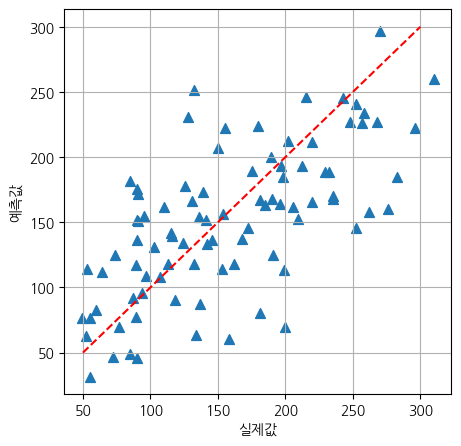

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred,s=50,marker='^')
plt.xlabel("실제값")
plt.ylabel("예측값")
plt.plot([50,300],[50,300], ls='--',c='r')
plt.grid()